In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

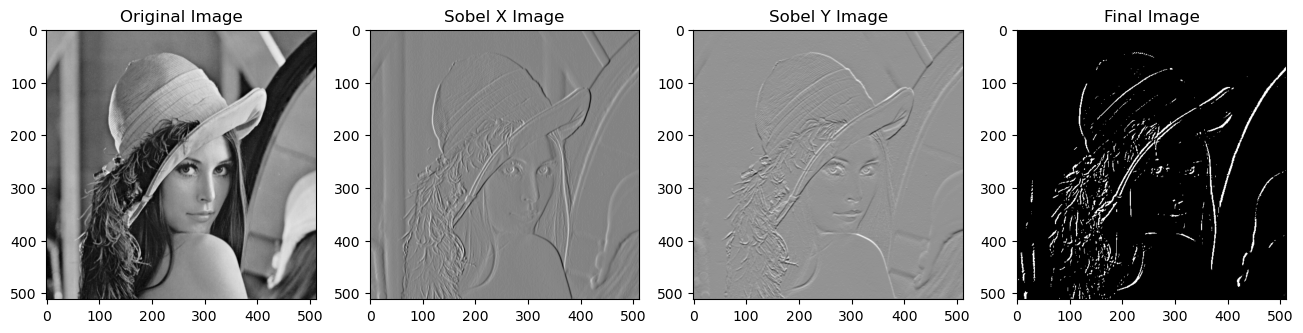

In [4]:
# Load the image
image = cv2.imread('../images/lenna.png', 0)

#Sobel parameters: ksize, dx, dy, ddepth
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 3)   #Sobel for horizontal edges
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = 3)   #Sobel for vertical edges

#Combine the Sobel images (optional)
combined_sobel = cv2.add(sobelx, sobely)

thresh, binary_sobel = cv2.threshold(combined_sobel, 120, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (16, 8))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap = 'gray')
plt.subplot(1, 4, 2)
plt.title('Sobel X Image')
plt.imshow(sobelx, cmap = 'gray')
plt.subplot(1, 4, 3)
plt.title('Sobel Y Image')
plt.imshow(sobely, cmap = 'gray')
plt.subplot(1, 4, 4)
plt.title('Final Image')
plt.imshow(binary_sobel, cmap = 'gray');

### Canny Edge Detection

In [6]:
img1 = cv2.imread('../images/lenna.png')
img2 = cv2.imread('../images/sun.png')

print(img1.shape, img2.shape)

(512, 512, 3) (512, 512, 3)


In [7]:
new_img = cv2.add(img1, img2)
final_img = np.hstack([img1, img2, new_img])

cv2.imshow('Added Images', final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
img = cv2.imread('../images/lenna.png', 0)  #Load as grayscale

# Apply Canny Edge Detection
edges = cv2.Canny(img, 50, 150)  # Adjust Thresholds if needed

# Display Image
cv2.imshow('Canny Images', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

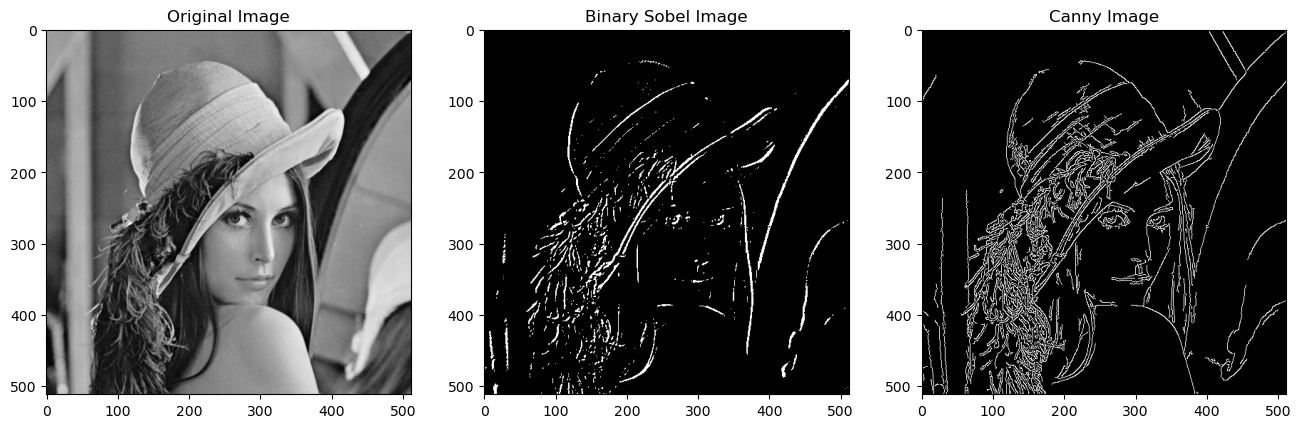

In [9]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.title('Binary Sobel Image')
plt.imshow(binary_sobel, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.title('Canny Image')
plt.imshow(edges, cmap = 'gray');

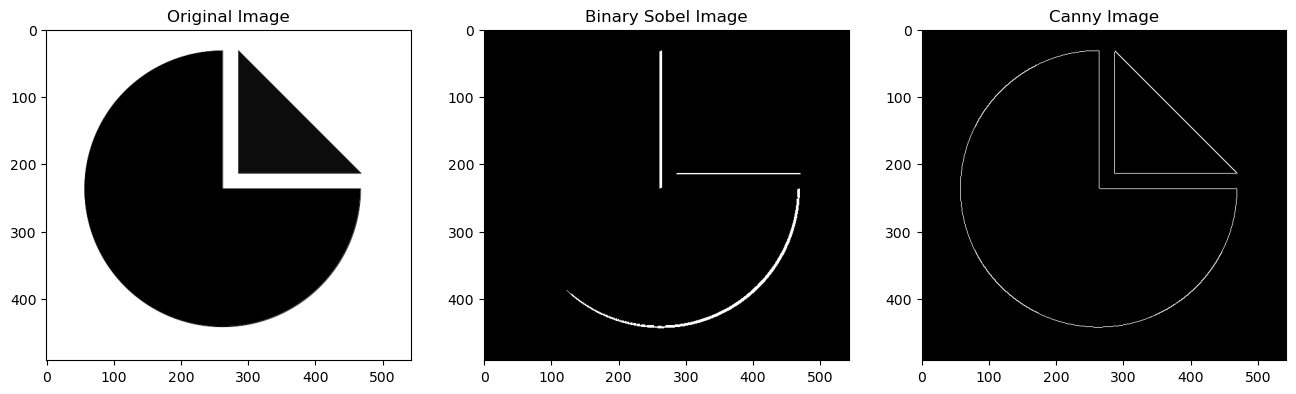

In [11]:
img = cv2.imread('../images/circle.png', 0)

#Sobel parameters: ksize, dx, dy, ddepth
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)   #Sobel for horizontal edges
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)   #Sobel for vertical edges

combined_sobel = cv2.add(sobelx, sobely)
thresh, binary_sobel = cv2.threshold(combined_sobel, 50, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(img, 50, 150)

plt.figure(figsize = (16, 8))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 3, 2)
plt.title('Binary Sobel Image')
plt.imshow(binary_sobel, cmap = 'gray')
plt.subplot(1, 3, 3)
plt.title('Canny Image')
plt.imshow(edges, cmap = 'gray');

### Harris Corner Detection

In [13]:
# Load the image
gray = cv2.imread('../images/circle.png', 0)
image = cv2.imread('../images/circle.png')

#Convert image to float32
gray = np.float32(gray)

#Apply the Harris corner detector
dst = cv2.cornerHarris(gray, blockSize = 2, ksize = 3, k = 0.4)

#Result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

#Threshold for an optimal value, it may vary depending on the image
image[dst > 0.01 * dst.max()] = [0, 0, 255]

#Display the result
cv2.imshow('Harris Corners', image)
cv2.waitKey(0)
cv2.destroyAllWindows()